In [1]:
# dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-11-01 10:37:54--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2024-11-01 10:37:54 (30.4 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [2]:
with open("input.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [3]:
print("The length of dataset: ", len(text))

The length of dataset:  1115394


In [4]:
sample = text[100:1000]
print(sample)

 are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.




In [5]:
a = "hello"
c = set(a)
c

{'e', 'h', 'l', 'o'}

In [6]:
sorted(list(c))

['e', 'h', 'l', 'o']

In [7]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print("".join(chars))
print(vocab_size) # our vocabulary for character level language model


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [8]:
# character to integer for mapping vocabulary foreach.

stoi = { ch:i for i, ch in enumerate(chars)} # character to index
itos = { i:ch for i, ch in enumerate(chars)} # index to character

In [9]:
stoi

{'\n': 0,
 ' ': 1,
 '!': 2,
 '$': 3,
 '&': 4,
 "'": 5,
 ',': 6,
 '-': 7,
 '.': 8,
 '3': 9,
 ':': 10,
 ';': 11,
 '?': 12,
 'A': 13,
 'B': 14,
 'C': 15,
 'D': 16,
 'E': 17,
 'F': 18,
 'G': 19,
 'H': 20,
 'I': 21,
 'J': 22,
 'K': 23,
 'L': 24,
 'M': 25,
 'N': 26,
 'O': 27,
 'P': 28,
 'Q': 29,
 'R': 30,
 'S': 31,
 'T': 32,
 'U': 33,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38,
 'a': 39,
 'b': 40,
 'c': 41,
 'd': 42,
 'e': 43,
 'f': 44,
 'g': 45,
 'h': 46,
 'i': 47,
 'j': 48,
 'k': 49,
 'l': 50,
 'm': 51,
 'n': 52,
 'o': 53,
 'p': 54,
 'q': 55,
 'r': 56,
 's': 57,
 't': 58,
 'u': 59,
 'v': 60,
 'w': 61,
 'x': 62,
 'y': 63,
 'z': 64}

In [10]:
encode = lambda s: [stoi[c] for c in s] # take a string output a list of integer
decode = lambda i: "".join([itos[c] for c in i]) # take a list of integer output a string

print(encode("what is AI?"))
print(decode(encode("What is AI?")))

[61, 46, 39, 58, 1, 47, 57, 1, 13, 21, 12]
What is AI?


In [11]:
# encoding the entire text dataset
import torch

data = torch.tensor(encode(text), dtype=torch.long) # all data encoded to its integer value
print(data.shape, data.dtype)
print(data[:100])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59])


In [12]:
len(text), data.shape # equal no of characters and integer after encoding the text

(1115394, torch.Size([1115394]))

In [13]:
# split data into train and validation set

n = int(0.9 * len(data)) # 90 percent of our data for train
train_data = data[:n]
val_data = data[n:]

In [14]:
decode(train_data[:200].tolist())

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you'

In [15]:
len(train_data), len(val_data)

(1003854, 111540)

In [16]:
# we dont send all data at once to the model, we send in chunk as block_size

block_size = 8
train_data[:block_size+1] # first nine character in dataset

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [17]:
x = train_data[:block_size]
y = train_data[1:block_size+1]

for t in range(block_size):
  context = x[:t + 1]
  target = y[t]
  print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [18]:
# concept for later
ix_ = torch.randint(10, (3, )) # get the random 3 integer from 0 to 9, 3 is batch size
ix_ # random index from 0 to 9 for our 2 block size batch so that if we get ix_ = 9 we can reach to index 11

tensor([0, 6, 1])

In [19]:
# concept for later
numbers = torch.arange(0, 12) # 11 number list
x_ = torch.stack([numbers[i:i+2] for i in ix_]) # 3 is block size so
x_ # here we get a data of 2 block size and 3 batch size

tensor([[0, 1],
        [6, 7],
        [1, 2]])

In [20]:
# torch.manual_seed(1337)
batch_size = 4 # how many sequence to process at one time
block_size = 8 # maximum context length for predictions

def get_batch(split):
  data = train_data if split == "train" else val_data
  ix = torch.randint(len(data) - block_size, (batch_size, )) # get random 8 integer from 0 to len(data) - 8
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  return x, y

In [21]:
xb, yb = get_batch("train")
print(f"Inputs: {xb.shape}")
print(xb)
print(f"Targets: {yb.shape}")
print(yb)

Inputs: torch.Size([4, 8])
tensor([[31, 32, 17, 30, 10,  0, 13, 50],
        [27, 30, 32, 20, 33, 25, 14, 17],
        [52,  6,  1, 39, 52,  1, 39,  5],
        [ 1, 59, 54,  0, 32, 46, 43, 47]])
Targets: torch.Size([4, 8])
tensor([[32, 17, 30, 10,  0, 13, 50, 39],
        [30, 32, 20, 33, 25, 14, 17, 30],
        [ 6,  1, 39, 52,  1, 39,  5,  1],
        [59, 54,  0, 32, 46, 43, 47, 56]])


In [22]:
yb[0], yb[0,0]

(tensor([32, 17, 30, 10,  0, 13, 50, 39]), tensor(32))

In [23]:
xb[0], yb[0]

(tensor([31, 32, 17, 30, 10,  0, 13, 50]),
 tensor([32, 17, 30, 10,  0, 13, 50, 39]))

In [24]:
for b in range(batch_size): # iterate 4 times as size of batch
  print(f"Start of batch {b}_____________________________________________")
  for t in range(block_size): # in each size iterate 8 time as for each item in a block size 8 for each
    context = xb[b, :t+1] #
    target = yb[b, t]
    print(f"when input is {context.tolist()} the target: {target}")
  print(f"End of batch {b}_______________________________________________")
  if b < batch_size - 1 : print(f"ANOTHER BATCH {b+1}\n\n")

Start of batch 0_____________________________________________
when input is [31] the target: 32
when input is [31, 32] the target: 17
when input is [31, 32, 17] the target: 30
when input is [31, 32, 17, 30] the target: 10
when input is [31, 32, 17, 30, 10] the target: 0
when input is [31, 32, 17, 30, 10, 0] the target: 13
when input is [31, 32, 17, 30, 10, 0, 13] the target: 50
when input is [31, 32, 17, 30, 10, 0, 13, 50] the target: 39
End of batch 0_______________________________________________
ANOTHER BATCH 1


Start of batch 1_____________________________________________
when input is [27] the target: 30
when input is [27, 30] the target: 32
when input is [27, 30, 32] the target: 20
when input is [27, 30, 32, 20] the target: 33
when input is [27, 30, 32, 20, 33] the target: 25
when input is [27, 30, 32, 20, 33, 25] the target: 14
when input is [27, 30, 32, 20, 33, 25, 14] the target: 17
when input is [27, 30, 32, 20, 33, 25, 14, 17] the target: 30
End of batch 1__________________

In [25]:
print(xb) # input to the transformer

tensor([[31, 32, 17, 30, 10,  0, 13, 50],
        [27, 30, 32, 20, 33, 25, 14, 17],
        [52,  6,  1, 39, 52,  1, 39,  5],
        [ 1, 59, 54,  0, 32, 46, 43, 47]])


In [26]:
# concept: tensor view
tensor = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12])
tensor.view(2,6), tensor.view(3,4), tensor.view(2,3,2)

(tensor([[ 1,  2,  3,  4,  5,  6],
         [ 7,  8,  9, 10, 11, 12]]),
 tensor([[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]]),
 tensor([[[ 1,  2],
          [ 3,  4],
          [ 5,  6]],
 
         [[ 7,  8],
          [ 9, 10],
          [11, 12]]]))

In [27]:
# concept: torch embedding
# (10, 3) # we have 10 words which make 3 dimension vector
embedding = torch.nn.Embedding(10, 3) # 10 tensor (num_embedding) of size 3 dimension vector
input = torch.LongTensor([[1,2,3,4],[5,6,7,8]]) # a batch of 2 samples of 4 indices each
output = embedding(input) # input (2,4) give output (2,4,3)
print(f"The shape of embedding: {output.shape}")
print(output)

The shape of embedding: torch.Size([2, 4, 3])
tensor([[[-0.3783, -1.8803,  0.6454],
         [-2.1319, -0.8648, -1.4766],
         [ 0.1165, -1.3962, -0.1022],
         [ 1.0629, -0.1155,  1.3533]],

        [[ 0.4556,  1.6895,  0.1224],
         [ 0.2740, -1.3413,  0.6144],
         [ 0.3884, -0.3687,  1.5095],
         [ 0.3987,  0.1470, -0.1014]]], grad_fn=<EmbeddingBackward0>)


In [28]:
# bigram language model
import torch
import torch.nn as nn
from torch.nn import functional as F

class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size) # 65 vocab, 65 dim embedding

  def forward(self, idx, targets=None):
    # get idx: xbatch targets: ybatch
    logits = self.token_embedding_table(idx) # input is (4, 8) input batch
    # print(logits.shape) # (4, 8, 65) B, T, C

    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      # reshape
      logits = logits.view(B*T, C) # (4 * 8, 65) = (32, 65)
      targets = targets.view(B*T) # (4 * 8) = (32)
      loss = F.cross_entropy(logits, targets)
    return logits, loss

  def generate(self, idx, max_new_tokens):
    # idx is (B, T) array in the current context
    for _ in range(max_new_tokens):
      # get the prediction
      logits, loss = self(idx)
      # focus only on the last time step
      logits = logits[:, -1, :] # becomes (B, C)
      # softmax to get probabilities
      probs = F.softmax(logits, dim=-1) # (B, C)
      # sample from the distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
      # append sampled index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B,T+1)
    # return the idx after generation
    return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape, loss) # 4 batch 8 time 65 dim embedding

torch.Size([32, 65]) tensor(4.8184, grad_fn=<NllLossBackward0>)


In [29]:
idx = torch.zeros((1,1), dtype=torch.long)
print(decode(m.generate(idx, max_new_tokens=100)[0].tolist()))


C!UypSIvi'3jRC$GMi$$$&RAVCVyR:OwSrRASu-ldZEI,LrYPnyXqosSC$gRqwct GLFqUB& flLr-c!scSbrydoeNDm?VVh:nNV


In [30]:
idx = torch.randint(0, 65, (2,3), dtype=torch.long)
print(decode(m.generate(idx, max_new_tokens=100)[0].tolist()))

3PerYUyR3i
pEcDOwTs-fmIh
AmPj'oe:dpGEvneEQItNWoGnbb&yqxjOxIhjz'3QL$VlviCZ;xIh?bowhsS?Asd3RR.JkKJdMAM.V.


In [31]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [32]:
batch_size = 32

for step in range(10000):
  xb, yb = get_batch("train")
  logits, loss = m(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()
  if step % 1000 == 0:
    print(f"Loss for step {step}: {loss}")

Loss for step 0: 4.608895301818848
Loss for step 1000: 3.7825841903686523
Loss for step 2000: 3.1414246559143066
Loss for step 3000: 2.867997169494629
Loss for step 4000: 2.5252697467803955
Loss for step 5000: 2.556774139404297
Loss for step 6000: 2.512263536453247
Loss for step 7000: 2.463785409927368
Loss for step 8000: 2.415276050567627
Loss for step 9000: 2.548347234725952


In [33]:
generated_token = m.generate(idx = torch.zeros((1,1), dtype=torch.long), max_new_tokens=100)
encoded_token = generated_token[0].tolist()
len(encoded_token)

101

In [34]:
decoded_token = decode(encoded_token)
print(decoded_token)


Hapllat OLI t; hiogeashenoneeant ske

Shallein,
Bur'soothepurswathbeth as somanke that wblickeept in


# self attention

In [35]:
B, T, C = 4, 8, 3 # batch size of 4 with block size 8 and 3 dimension
x = torch.randn(B, T, C)
x.shape

torch.Size([4, 8, 3])

In [36]:
a = torch.ones(3,3)
b = torch.randint(0,10, (3, 2)).float()
c = a @ b
print("Matrix multiply")
print(a)
print(b)
print(c)

Matrix multiply
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[3., 1.],
        [2., 5.],
        [2., 5.]])
tensor([[ 7., 11.],
        [ 7., 11.],
        [ 7., 11.]])


In [37]:
tril = torch.tril(torch.ones(3,3)) # lower traingular matrix of one

In [38]:
a = torch.tril(torch.ones(3,3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10, (3, 2)).float()
c = a @ b
print("Matrix multiply")
print(a)
print(b)
print(c)

Matrix multiply
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
tensor([[2., 7.],
        [2., 1.],
        [6., 3.]])
tensor([[2.0000, 7.0000],
        [2.0000, 4.0000],
        [3.3333, 3.6667]])


In [39]:
wei = torch.tril(torch.ones(T, T)) # (8, 8)
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x # (T, T) -> (B, T, T) . (B, T , C) --> (B, T, C)

xbow2.shape, xbow2[0] # (1, 8, 8) (4, 8, 3)

(torch.Size([4, 8, 3]),
 tensor([[-0.1099, -0.5386,  0.8606],
         [ 0.0681, -0.8620, -0.2292],
         [-0.6019, -0.8314,  0.4696],
         [ 0.0402, -0.2823,  0.5711],
         [-0.0079, -0.3754,  0.5015],
         [ 0.2198, -0.4056,  0.3005],
         [ 0.3952, -0.2648,  0.1290],
         [ 0.3106, -0.2835,  0.0754]]))

In [40]:
tril = torch.tril(torch.ones(T, T))
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [41]:
wei = torch.zeros((T,T))
wei

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [42]:
wei = wei.masked_fill(tril == 0, float('-inf'))
wei

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [43]:
wei = F.softmax(wei, dim=1)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [44]:
# another way : softmax using
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float("-inf"))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
xbow3.shape

torch.Size([4, 8, 3])

In [45]:
torch.allclose(xbow2, xbow3) # they are equal

True

In [46]:
matrix = torch.tril(torch.ones(3,3))
matrix

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [47]:
matrix.transpose(0, 1)

tensor([[1., 1., 1.],
        [0., 1., 1.],
        [0., 0., 1.]])

In [48]:
matrix_a = torch.randn((4, 6, 1))
matrix_b = torch.transpose(matrix_a, dim0=-3, dim1=-1)
matrix_c = torch.transpose(matrix_a, dim0=2, dim1=0)

In [49]:
print(f"Before transponse: {matrix_a.shape}\nAfter transpose: {matrix_b.shape}")
print(f"another way: {matrix_c.shape}")

Before transponse: torch.Size([4, 6, 1])
After transpose: torch.Size([1, 6, 4])
another way: torch.Size([1, 6, 4])


In [50]:
B, T, C = 4, 8, 32

x = torch.randn(B, T, C)

# single attention head
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

k = key(x) # (B, T, 16)
q = query(x) # (B, T, 16)
v = value(x) # (B, T, 16)
wei = q @ k.transpose(-2, -1) * head_size ** -0.5
# (B, T, 16) @ (B, 16, T) -> (B, T, T)

tril = torch.tril((torch.ones(T, T))) # 8 * 8 lower triangular matrix

# wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float("-inf"))
wei = F.softmax(wei, dim=-1)
out = wei @ v
# out = wei @ x
out.shape

torch.Size([4, 8, 16])

In [51]:
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [52]:
wei.shape # (4, 8, 8) # attention weight for 4 in a batch

torch.Size([4, 8, 8])

In [53]:
wei[0] # masked attention weight

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4279, 0.5721, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4666, 0.2776, 0.2559, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1485, 0.3333, 0.2793, 0.2389, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0926, 0.1351, 0.1861, 0.2243, 0.3619, 0.0000, 0.0000, 0.0000],
        [0.2268, 0.1521, 0.1090, 0.2452, 0.1104, 0.1567, 0.0000, 0.0000],
        [0.1377, 0.1289, 0.1282, 0.0870, 0.1696, 0.1240, 0.2247, 0.0000],
        [0.0793, 0.1147, 0.1189, 0.1612, 0.2016, 0.0368, 0.1803, 0.1072]],
       grad_fn=<SelectBackward0>)

In [54]:
k = torch.randn(B, T, head_size)
q = torch.randn(B, T, head_size)
wei = q @ k.transpose(-2, -1)

print("Variance of k: ", k.var())
print("Variance of q: ", q.var())
print("Variance of wei: ", wei.var())

Variance of k:  tensor(0.9494)
Variance of q:  tensor(0.9509)
Variance of wei:  tensor(14.1284)


In [55]:
# after scaling
k = torch.randn(B, T, head_size)
q = torch.randn(B, T, head_size)
wei = q @ k.transpose(-2, -1) * head_size ** -0.5

print("Variance of k: ", k.var())
print("Variance of q: ", q.var())
print("Variance of wei: ", wei.var())

Variance of k:  tensor(1.0239)
Variance of q:  tensor(0.9385)
Variance of wei:  tensor(0.8339)


In [56]:
# multihead attention
# feed forward neural network
# repeat the block for multiple time
# decode the output

# Simple Bigram Language Model: Version 1

In [144]:
import torch
import torch.nn as nn
from torch.nn import functional

# hyperparameter
batch_size = 32 # no of independent example at once
block_size = 8 # context length for prediction
max_iters = 3000 # no of iteration we want to do
eval_interval = 300 # at each interval do the evaluation
learning_rate = 1e-2 # setting up learning rate
device = "cuda" if torch.cuda.is_available() else "cpu" # device agnositc code
eval_iters = 200

torch.manual_seed(2) # seed for reproducibility

# getting the dataset
with open("input.txt", "r", encoding="utf-8") as f:
  text = f.read()

# character vocabulary for our character level model
chars = sorted(list(set(text)))
vocab_size = len(chars)

# mapping from character to index in the vocabulary set
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s] # take a string and output a list of index integer
decode = lambda l: "".join([itos[i] for i in l]) # take a list of index and then return the string by mapping

# train and test split
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
validation_data = data[n:]

# data loading
def get_batch(split: str):
  data = train_data if split == "train" else validation_data
  ix = torch.randint(len(data) - block_size, (batch_size, ))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  x, y = x.to(device), y.to(device) # set to device
  return x, y

# util
@torch.no_grad()
def estimate_loss(model):
  out = {}
  model.eval()
  for split in ["train", "validation"]:
    losses = torch.zeros(eval_iters)
    for k in range(eval_iters):
      X, Y = get_batch(split)
      logits, loss = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  model.train()
  return out

# version 1 model
class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()
    self.token_embedding_table = torch.nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets=None):
    # idx and targets are both (B, T) tensor
    logits = self.token_embedding_table(idx) # batch, time , embedding

    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      # reshaping the tensor
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      # get the predictions
      logits, loss = self(idx)
      # focus only on the last time step
      logits = logits[:, -1, :] # becomes B, C
      # softmax
      probs = F.softmax(logits, dim=-1) # (B, C) in inner dimension
      # sample from distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
      # append sample index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    return idx

model = BigramLanguageModel(vocab_size)
m = model.to(device)

# create an optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

  # every once in a while evaluate the loss on train and val set
  if iter % eval_interval == 0:
    losses = estimate_loss(model)
    print(f"Step: {iter} Train loss: {losses['train']:.4f} Validation loss: {losses['validation']:.4f}")

  # sample a batch of data
  xb, yb = get_batch("train")

  # evaluate the loss
  logits, loss = model(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

# generate from the model above
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)

Step: 0 Train loss: 4.5501 Validation loss: 4.5599
Step: 300 Train loss: 2.7788 Validation loss: 2.7888
Step: 600 Train loss: 2.5429 Validation loss: 2.5498
Step: 900 Train loss: 2.4890 Validation loss: 2.5196
Step: 1200 Train loss: 2.4827 Validation loss: 2.5075
Step: 1500 Train loss: 2.4744 Validation loss: 2.4906
Step: 1800 Train loss: 2.4670 Validation loss: 2.4966
Step: 2100 Train loss: 2.4672 Validation loss: 2.4910
Step: 2400 Train loss: 2.4648 Validation loss: 2.4923
Step: 2700 Train loss: 2.4630 Validation loss: 2.4874

Clebeee, cou t anat.'s om ch hiubre mnf merto whu; se INThiserdraupito id beroucor beand we pat boteaico ag hinfere,
I amng ofomamithy,
Lene sere
Prorkingu im, O: s
SI wit st s ane t her hare d thyounve hereamepy us, he KInloo uthafevinga ashit qsbelercof f tieth.
Lore ath oretourongalinck.
IVAhas heeye INGod I anyos, ipre ant anofout fovet w w ps wine f y athail sues tthand:

Bigrs'se hthor, whithineKIs:
ING jureche,
TEOnsh iowi'shire! anthir, foud, ild ies o 

<ipython-input-151-1d41bf27b6a9>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context = context = torch.tensor(context, dtype=torch.long, device=device)


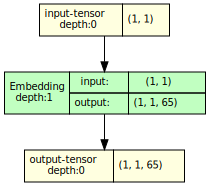

In [151]:
import torchview

context = context = torch.tensor(context, dtype=torch.long, device=device)

view = torchview.draw_graph(model, context)
view.visual_graph

In [154]:
view.visual_graph.render(filename="v0",format ="png")

'png/v0.png'

In [157]:
model

BigramLanguageModel(
  (token_embedding_table): Embedding(65, 65)
)

# Adding self attention:
- update embedding layer by adding more layer
- self attention
- position embedding

In [2]:
import torch
import torch.nn as nn
from torch.nn import functional

# hyperparameter
batch_size = 32 # no of independent example at once
block_size = 8 # context length for prediction
max_iters = 3000 # no of iteration we want to do
eval_interval = 300 # at each interval do the evaluation
learning_rate = 1e-2 # setting up learning rate
device = "cuda" if torch.cuda.is_available() else "cpu" # device agnositc code
eval_iters = 200

# new
n_embed = 32 # embedding dimension

torch.manual_seed(2) # seed for reproducibility

# getting the dataset
with open("input.txt", "r", encoding="utf-8") as f:
  text = f.read()

# character vocabulary for our character level model
chars = sorted(list(set(text)))
vocab_size = len(chars)

# mapping from character to index in the vocabulary set
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s] # take a string and output a list of index integer
decode = lambda l: "".join([itos[i] for i in l]) # take a list of index and then return the string by mapping

# train and test split
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
validation_data = data[n:]

# data loading
def get_batch(split: str):
  data = train_data if split == "train" else validation_data
  ix = torch.randint(len(data) - block_size, (batch_size, ))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  x, y = x.to(device), y.to(device) # set to device
  return x, y

# util
@torch.no_grad()
def estimate_loss(model):
  out = {}
  model.eval()
  for split in ["train", "validation"]:
    losses = torch.zeros(eval_iters)
    for k in range(eval_iters):
      X, Y = get_batch(split)
      logits, loss = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  model.train()
  return out

# version 1 model
class BigramLanguageModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.token_embedding_table = torch.nn.Embedding(vocab_size, n_embed) # embedding size
    self.lm_head = nn.Linear(in_features=n_embed, out_features=vocab_size) # linear layer
    self.position_embedding_table = nn.Embedding(block_size, n_embed) # position embedding encode


  def forward(self, idx, targets=None):
    B, T = idx.shape
    # idx and targets are both (B, T) tensor
    token_embedding = self.token_embedding_table(idx) # batch, time , embedding
    position_embedding = self.position_embedding_table(torch.arange(T, device=device)) # (T, C) # integer to identify position for each position in context length
    x = token_embedding + position_embedding # (B, T, C)
    logits = self.lm_head(x) # batch, time, V

    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      # reshaping the tensor
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      # get the predictions
      # only send the last prediction as context to the model
      logits, loss = self(idx[:, -block_size:])

      # logits, loss = self(idx)
      # focus only on the last time step
      logits = logits[:, -1, :] # becomes B, C
      # softmax
      probs = F.softmax(logits, dim=-1) # (B, C) in inner dimension
      # sample from distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
      # append sample index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    return idx

model = BigramLanguageModel()
m = model.to(device)

# create an optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

  # every once in a while evaluate the loss on train and val set
  if iter % eval_interval == 0:
    losses = estimate_loss(model)
    print(f"Step: {iter} Train loss: {losses['train']:.4f} Validation loss: {losses['validation']:.4f}")

  # sample a batch of data
  xb, yb = get_batch("train")

  # evaluate the loss
  logits, loss = model(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

# generate from the model above
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)

In [59]:
# Adding attention
class Head(nn.Module):
  def __init__(self, head_size):
    super().__init__()
    self.key = nn.Linear(n_embed, head_size, bias=False)
    self.query = nn.Linear(n_embed, head_size, bias=False)
    self.value = nn.Linear(n_embed, head_size, bias=False)
    self.register_buffer("tril", torch.tril(torch.ones(block_size, block_size)))

  def forward(self, x):
    B, T, C = x.shape
    k = self.key(x) # (B, T, C)
    q = self.query(x) # (B, T, C)

    wei = q @ k.transpose(-2, -1) * C ** -0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
    wei = wei.masked_fill(self.tril[:T, :T] == 0, float("-inf"))

    wei = F.softmax(wei, dim=-1)
    v = self.value(x) # B, T, C
    out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
    return out

# adding attention class to model

In [60]:
import torch
import torch.nn as nn
from torch.nn import functional

# hyperparameter
batch_size = 32 # no of independent example at once
block_size = 8 # context length for prediction
max_iters = 3000 # no of iteration we want to do
eval_interval = 300 # at each interval do the evaluation
learning_rate = 1e-2 # setting up learning rate
device = "cuda" if torch.cuda.is_available() else "cpu" # device agnositc code
eval_iters = 200

# new
n_embed = 32 # embedding dimension

torch.manual_seed(2) # seed for reproducibility

# getting the dataset
with open("input.txt", "r", encoding="utf-8") as f:
  text = f.read()

# character vocabulary for our character level model
chars = sorted(list(set(text)))
vocab_size = len(chars)

# mapping from character to index in the vocabulary set
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s] # take a string and output a list of index integer
decode = lambda l: "".join([itos[i] for i in l]) # take a list of index and then return the string by mapping

# train and test split
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
validation_data = data[n:]

# data loading
def get_batch(split: str):
  data = train_data if split == "train" else validation_data
  ix = torch.randint(len(data) - block_size, (batch_size, ))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  x, y = x.to(device), y.to(device) # set to device
  return x, y

# util
@torch.no_grad()
def estimate_loss(model):
  out = {}
  model.eval()
  for split in ["train", "validation"]:
    losses = torch.zeros(eval_iters)
    for k in range(eval_iters):
      X, Y = get_batch(split)
      logits, loss = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  model.train()
  return out

# version 1 model
class BigramLanguageModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.token_embedding_table = torch.nn.Embedding(vocab_size, n_embed) # embedding size
    self.lm_head = nn.Linear(in_features=n_embed, out_features=vocab_size) # linear layer
    self.position_embedding_table = nn.Embedding(block_size, n_embed) # position embedding encode

    # new
    self.sa_head = Head(n_embed)


  def forward(self, idx, targets=None):
    B, T = idx.shape
    # idx and targets are both (B, T) tensor
    token_embedding = self.token_embedding_table(idx) # batch, time , embedding
    position_embedding = self.position_embedding_table(torch.arange(T, device=device)) # (T, C) # integer to identify position for each position in context length
    x = token_embedding + position_embedding # (B, T, C)

    # new
    x = self.sa_head(x)
    logits = self.lm_head(x) # batch, time, V

    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      # reshaping the tensor
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      # get the predictions
      # only send the last prediction as context to the model
      # crop index to the last block_size token only
      idx_cond = idx[:, -block_size:]
      logits, loss = self(idx_cond)

      # logits, loss = self(idx)
      # focus only on the last time step
      logits = logits[:, -1, :] # becomes B, C
      # softmax
      probs = F.softmax(logits, dim=-1) # (B, C) in inner dimension
      # sample from distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
      # append sample index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    return idx

model = BigramLanguageModel()
m = model.to(device)

# create an optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

  # every once in a while evaluate the loss on train and val set
  if iter % eval_interval == 0:
    losses = estimate_loss(model)
    print(f"Step: {iter} Train loss: {losses['train']:.4f} Validation loss: {losses['validation']:.4f}")

  # sample a batch of data
  xb, yb = get_batch("train")

  # evaluate the loss
  logits, loss = model(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

# generate from the model above
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)

Step: 0 Train loss: 4.2412 Validation loss: 4.2376
Step: 300 Train loss: 2.5190 Validation loss: 2.5200
Step: 600 Train loss: 2.4617 Validation loss: 2.4725
Step: 900 Train loss: 2.4427 Validation loss: 2.4743
Step: 1200 Train loss: 2.4287 Validation loss: 2.4636
Step: 1500 Train loss: 2.4288 Validation loss: 2.4293
Step: 1800 Train loss: 2.4259 Validation loss: 2.4313
Step: 2100 Train loss: 2.4137 Validation loss: 2.4534
Step: 2400 Train loss: 2.4309 Validation loss: 2.4329
Step: 2700 Train loss: 2.4110 Validation loss: 2.4396

CAUbeer, cout rouat.

OPOR:
A futre mn yourto wau; searay lser: aupito ide me, coro, fit weipapratout: omaghe noure, aramn dofourmithy.


LAUSIS:
R
BUSI yu im, Od stulow thalve ane pareofoure pourbemave ifuta sph'us, he KIn oo uthafut
Wha asist msbeler of fe iet chikee ath othto son, lik pal sthas hee be
Wthaik any sse'pratant anofu thaivet wha ppalile fe kathair suss Gthafrord igas'so ht fouse swhinefos:
I Go, ouche, queash impu'shigho anthir, foud, ild ithoo 

# adding multihead attention now

In [61]:
class MultiHeadAttention(nn.Module):
  def __init__(self, num_heads, head_size):
    super().__init__()
    self.heads = nn.ModuleList(
        [Head(head_size) for _ in range(num_heads)]
    )

  def forward(self, x):
    return torch.cat(
        [h(x) for h in self.heads], dim=-1
    )

In [62]:
import torch
import torch.nn as nn
from torch.nn import functional

# hyperparameter
batch_size = 32 # no of independent example at once
block_size = 8 # context length for prediction
max_iters = 3000 # no of iteration we want to do
eval_interval = 300 # at each interval do the evaluation
learning_rate = 1e-2 # setting up learning rate
device = "cuda" if torch.cuda.is_available() else "cpu" # device agnositc code
eval_iters = 200

# new
n_embed = 32 # embedding dimension

torch.manual_seed(2) # seed for reproducibility

# getting the dataset
with open("input.txt", "r", encoding="utf-8") as f:
  text = f.read()

# character vocabulary for our character level model
chars = sorted(list(set(text)))
vocab_size = len(chars)

# mapping from character to index in the vocabulary set
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s] # take a string and output a list of index integer
decode = lambda l: "".join([itos[i] for i in l]) # take a list of index and then return the string by mapping

# train and test split
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
validation_data = data[n:]

# data loading
def get_batch(split: str):
  data = train_data if split == "train" else validation_data
  ix = torch.randint(len(data) - block_size, (batch_size, ))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  x, y = x.to(device), y.to(device) # set to device
  return x, y

# util
@torch.no_grad()
def estimate_loss(model):
  out = {}
  model.eval()
  for split in ["train", "validation"]:
    losses = torch.zeros(eval_iters)
    for k in range(eval_iters):
      X, Y = get_batch(split)
      logits, loss = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  model.train()
  return out

# version 1 model
class BigramLanguageModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.token_embedding_table = torch.nn.Embedding(vocab_size, n_embed) # embedding size
    self.lm_head = nn.Linear(in_features=n_embed, out_features=vocab_size) # linear layer
    self.position_embedding_table = nn.Embedding(block_size, n_embed) # position embedding encode

    # new
    self.sa_heads = MultiHeadAttention(4, n_embed//4) # which mean 4 heads of 8 dimensional self attention


  def forward(self, idx, targets=None):
    B, T = idx.shape
    # idx and targets are both (B, T) tensor
    token_embedding = self.token_embedding_table(idx) # batch, time , embedding
    position_embedding = self.position_embedding_table(torch.arange(T, device=device)) # (T, C) # integer to identify position for each position in context length
    x = token_embedding + position_embedding # (B, T, C)

    # new
    x = self.sa_heads(x)
    logits = self.lm_head(x) # batch, time, V

    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      # reshaping the tensor
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      # get the predictions
      # only send the last prediction as context to the model
      # crop index to the last block_size token only
      idx_cond = idx[:, -block_size:]
      logits, loss = self(idx_cond)

      # logits, loss = self(idx)
      # focus only on the last time step
      logits = logits[:, -1, :] # becomes B, C
      # softmax
      probs = F.softmax(logits, dim=-1) # (B, C) in inner dimension
      # sample from distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
      # append sample index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    return idx

model = BigramLanguageModel()
m = model.to(device)

# create an optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

  # every once in a while evaluate the loss on train and val set
  if iter % eval_interval == 0:
    losses = estimate_loss(model)
    print(f"Step: {iter} Train loss: {losses['train']:.4f} Validation loss: {losses['validation']:.4f}")

  # sample a batch of data
  xb, yb = get_batch("train")

  # evaluate the loss
  logits, loss = model(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

# generate from the model above
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)

Step: 0 Train loss: 4.2091 Validation loss: 4.2014
Step: 300 Train loss: 2.4139 Validation loss: 2.4149
Step: 600 Train loss: 2.3234 Validation loss: 2.3368
Step: 900 Train loss: 2.2881 Validation loss: 2.3296
Step: 1200 Train loss: 2.2576 Validation loss: 2.3146
Step: 1500 Train loss: 2.2515 Validation loss: 2.2726
Step: 1800 Train loss: 2.2513 Validation loss: 2.2850
Step: 2100 Train loss: 2.2331 Validation loss: 2.2981
Step: 2400 Train loss: 2.2429 Validation loss: 2.2921
Step: 2700 Train loss: 2.2076 Validation loss: 2.2825

CAMN:
Noucout romay.'
Aom chroout?

MYu histo wau; Fearch hat mur pit wide me, com bokin weir be It tion agpeverere, hramn dooulamithy,
A Ler?
Whiur thing oum, Or st I wit spes and toreorome cong befave hereavepppurom mandn to uporfutp ut ast, busbelt.

GRAUDIOLIO:
Whe stw ourto son
Flike I as has hee be
Wtih I wilsese'peat not oof ut foret whathsfor y fe kneatir sues Grum hath inks's whilf'ls hith befoorinfe, booch by EoY:
Wit As hightir harr, ford, ist ith on

# adding a computation block to the model (feed forward layer)

In [63]:
class FeedForward(nn.Module):
  def __init__(self, n_embed):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(n_embed, n_embed),
        nn.ReLU()
    )

  def forward(self, x):
    return self.net(x)

In [64]:
import torch
import torch.nn as nn
from torch.nn import functional

# hyperparameter
batch_size = 32 # no of independent example at once
block_size = 8 # context length for prediction
max_iters = 3000 # no of iteration we want to do
eval_interval = 300 # at each interval do the evaluation
learning_rate = 1e-2 # setting up learning rate
device = "cuda" if torch.cuda.is_available() else "cpu" # device agnositc code
eval_iters = 200

# new
n_embed = 32 # embedding dimension

torch.manual_seed(2) # seed for reproducibility

# getting the dataset
with open("input.txt", "r", encoding="utf-8") as f:
  text = f.read()

# character vocabulary for our character level model
chars = sorted(list(set(text)))
vocab_size = len(chars)

# mapping from character to index in the vocabulary set
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s] # take a string and output a list of index integer
decode = lambda l: "".join([itos[i] for i in l]) # take a list of index and then return the string by mapping

# train and test split
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
validation_data = data[n:]

# data loading
def get_batch(split: str):
  data = train_data if split == "train" else validation_data
  ix = torch.randint(len(data) - block_size, (batch_size, ))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  x, y = x.to(device), y.to(device) # set to device
  return x, y

# util
@torch.no_grad()
def estimate_loss(model):
  out = {}
  model.eval()
  for split in ["train", "validation"]:
    losses = torch.zeros(eval_iters)
    for k in range(eval_iters):
      X, Y = get_batch(split)
      logits, loss = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  model.train()
  return out

# version 1 model
class BigramLanguageModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.token_embedding_table = torch.nn.Embedding(vocab_size, n_embed) # embedding size
    self.lm_head = nn.Linear(in_features=n_embed, out_features=vocab_size) # linear layer
    self.position_embedding_table = nn.Embedding(block_size, n_embed) # position embedding encode
    self.sa_heads = MultiHeadAttention(4, n_embed//4) # which mean 4 heads of 8 dimensional self attention

    # new
    self.ffwd = FeedForward(n_embed)


  def forward(self, idx, targets=None):
    B, T = idx.shape
    # idx and targets are both (B, T) tensor
    token_embedding = self.token_embedding_table(idx) # batch, time , embedding
    position_embedding = self.position_embedding_table(torch.arange(T, device=device)) # (T, C) # integer to identify position for each position in context length
    x = token_embedding + position_embedding # (B, T, C)
    # multiple self attention
    x = self.sa_heads(x)
    # feed forward layer
    x = self.ffwd(x)
    # logit layer
    logits = self.lm_head(x) # batch, time, V

    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      # reshaping the tensor
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      # get the predictions
      # only send the last prediction as context to the model
      # crop index to the last block_size token only
      idx_cond = idx[:, -block_size:]
      logits, loss = self(idx_cond)

      # logits, loss = self(idx)
      # focus only on the last time step
      logits = logits[:, -1, :] # becomes B, C
      # softmax
      probs = F.softmax(logits, dim=-1) # (B, C) in inner dimension
      # sample from distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
      # append sample index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    return idx

model = BigramLanguageModel()
m = model.to(device)

# create an optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

  # every once in a while evaluate the loss on train and val set
  if iter % eval_interval == 0:
    losses = estimate_loss(model)
    print(f"Step: {iter} Train loss: {losses['train']:.4f} Validation loss: {losses['validation']:.4f}")

  # sample a batch of data
  xb, yb = get_batch("train")

  # evaluate the loss
  logits, loss = model(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

# generate from the model above
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)

Step: 0 Train loss: 4.1512 Validation loss: 4.1520
Step: 300 Train loss: 2.3965 Validation loss: 2.3978
Step: 600 Train loss: 2.2982 Validation loss: 2.3015
Step: 900 Train loss: 2.2517 Validation loss: 2.2772
Step: 1200 Train loss: 2.2364 Validation loss: 2.2811
Step: 1500 Train loss: 2.2092 Validation loss: 2.2538
Step: 1800 Train loss: 2.2034 Validation loss: 2.2505
Step: 2100 Train loss: 2.1917 Validation loss: 2.2563
Step: 2400 Train loss: 2.1980 Validation loss: 2.2368
Step: 2700 Train loss: 2.1644 Validation loss: 2.2263

CAUNGLET:
What and sus om chan unre my your of Hus seard? laind a pit wide me gray belle weld bearte is mades nocee,
I amn dood,
Withy,
Anderserepurove willim,
Or stulow thalss and threo hard donobeme saife
I spy unomee Krnlake what.

Whave
Us besbelercoun stiet croke
Ther of to god
Fleccy.

JOL:
Whee be
Whis is ny she'er tand anof upfor tis malls wite fe kneatir such to my, notigks's hat fros hing befor:
If:
Herechery Eldsh it As hire
Sant, rucferd, is an hoor

# residual layer in the architecture

In [65]:
class ResidualBlock(nn.Module):
  def __init__(self, n_embed, n_head):
    # n_embed: embedding dimension
    # n_head: no of head we want
    super().__init__()
    head_size = n_embed // n_head
    self.sa = MultiHeadAttention(n_head, head_size)
    self.ffwd = FeedForward(n_embed)

  def forward(self, x):
    x = x + self.sa(x)
    x = x + self.ffwd(x)
    return x

In [66]:
import torch
import torch.nn as nn
from torch.nn import functional

# hyperparameter
batch_size = 32 # no of independent example at once
block_size = 8 # context length for prediction
max_iters = 3000 # no of iteration we want to do
eval_interval = 300 # at each interval do the evaluation
learning_rate = 1e-2 # setting up learning rate
device = "cuda" if torch.cuda.is_available() else "cpu" # device agnositc code
eval_iters = 200

# new
n_embed = 32 # embedding dimension

torch.manual_seed(2) # seed for reproducibility

# getting the dataset
with open("input.txt", "r", encoding="utf-8") as f:
  text = f.read()

# character vocabulary for our character level model
chars = sorted(list(set(text)))
vocab_size = len(chars)

# mapping from character to index in the vocabulary set
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s] # take a string and output a list of index integer
decode = lambda l: "".join([itos[i] for i in l]) # take a list of index and then return the string by mapping

# train and test split
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
validation_data = data[n:]

# data loading
def get_batch(split: str):
  data = train_data if split == "train" else validation_data
  ix = torch.randint(len(data) - block_size, (batch_size, ))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  x, y = x.to(device), y.to(device) # set to device
  return x, y

# util
@torch.no_grad()
def estimate_loss(model):
  out = {}
  model.eval()
  for split in ["train", "validation"]:
    losses = torch.zeros(eval_iters)
    for k in range(eval_iters):
      X, Y = get_batch(split)
      logits, loss = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  model.train()
  return out

# version 1 model
class BigramLanguageModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.token_embedding_table = torch.nn.Embedding(vocab_size, n_embed) # embedding size
    self.lm_head = nn.Linear(in_features=n_embed, out_features=vocab_size) # linear layer
    self.position_embedding_table = nn.Embedding(block_size, n_embed) # position embedding encode

    # new
    self.blocks = nn.Sequential(
        ResidualBlock(n_embed, n_head=4),
        ResidualBlock(n_embed, n_head=4),
        ResidualBlock(n_embed, n_head=4)
    )


  def forward(self, idx, targets=None):
    B, T = idx.shape
    # idx and targets are both (B, T) tensor
    token_embedding = self.token_embedding_table(idx) # batch, time , embedding
    position_embedding = self.position_embedding_table(torch.arange(T, device=device)) # (T, C) # integer to identify position for each position in context length
    x = token_embedding + position_embedding # (B, T, C)

    # new
    x = self.blocks(x)

    # logit layer
    logits = self.lm_head(x) # batch, time, V

    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      # reshaping the tensor
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      # get the predictions
      # only send the last prediction as context to the model
      # crop index to the last block_size token only
      idx_cond = idx[:, -block_size:]
      logits, loss = self(idx_cond)

      # logits, loss = self(idx)
      # focus only on the last time step
      logits = logits[:, -1, :] # becomes B, C
      # softmax
      probs = F.softmax(logits, dim=-1) # (B, C) in inner dimension
      # sample from distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
      # append sample index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    return idx

model = BigramLanguageModel()
m = model.to(device)

# create an optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

  # every once in a while evaluate the loss on train and val set
  if iter % eval_interval == 0:
    losses = estimate_loss(model)
    print(f"Step: {iter} Train loss: {losses['train']:.4f} Validation loss: {losses['validation']:.4f}")

  # sample a batch of data
  xb, yb = get_batch("train")

  # evaluate the loss
  logits, loss = model(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

# generate from the model above
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)

Step: 0 Train loss: 5.0535 Validation loss: 5.0486
Step: 300 Train loss: 2.3647 Validation loss: 2.3848
Step: 600 Train loss: 2.2829 Validation loss: 2.3115
Step: 900 Train loss: 2.2223 Validation loss: 2.2611
Step: 1200 Train loss: 2.1868 Validation loss: 2.2595
Step: 1500 Train loss: 2.1746 Validation loss: 2.2421
Step: 1800 Train loss: 2.1445 Validation loss: 2.2204
Step: 2100 Train loss: 2.1451 Validation loss: 2.2201
Step: 2400 Train loss: 2.1580 Validation loss: 2.1894
Step: 2700 Train loss: 2.1253 Validation loss: 2.1866

Clebtee, courtes all's owech hing?

My your of Hud sead,?

KECHARGALUS:
So me, comp, and we pare.

CI:
Myagee not to haven dofolamin ye.

EAMIO:
Gur this upim, Or shulows bales and that bove conthy
Bave if this yius, he Kon to uw Iferp ut to stilsbe tiboun stiet croowe, whave to god, love I  speard!
Ay wouth's thay she's nof
That fout foret what's lace in kneatie sued this hade iges's 'd.

Sose swed'sKrs:
I digno
che,'d pase in A's Crening?

In ford, ild it you

# layer normalization

In [67]:
class ResidualBlock(nn.Module):
  def __init__(self, n_embed, n_head):
    # n_embed: embedding dimension
    # n_head: no of head we want
    super().__init__()
    head_size = n_embed // n_head
    self.sa = MultiHeadAttention(n_head, head_size)
    self.ffwd = FeedForward(n_embed)
    self.ln1 = nn.LayerNorm(n_embed)
    self.ln2 = nn.LayerNorm(n_embed)

  def forward(self, x):
    x = x + self.sa(x)
    x = x + self.ffwd(x)
    x = x + self.sa(self.ln1(x))
    x = x + self.ffwd(self.ln2(x))
    return x

In [68]:
import torch
import torch.nn as nn
from torch.nn import functional

# hyperparameter
batch_size = 32 # no of independent example at once
block_size = 8 # context length for prediction
max_iters = 3000 # no of iteration we want to do
eval_interval = 300 # at each interval do the evaluation
learning_rate = 1e-2 # setting up learning rate
device = "cuda" if torch.cuda.is_available() else "cpu" # device agnositc code
eval_iters = 200

# new
n_embed = 32 # embedding dimension

torch.manual_seed(2) # seed for reproducibility

# getting the dataset
with open("input.txt", "r", encoding="utf-8") as f:
  text = f.read()

# character vocabulary for our character level model
chars = sorted(list(set(text)))
vocab_size = len(chars)

# mapping from character to index in the vocabulary set
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s] # take a string and output a list of index integer
decode = lambda l: "".join([itos[i] for i in l]) # take a list of index and then return the string by mapping

# train and test split
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
validation_data = data[n:]

# data loading
def get_batch(split: str):
  data = train_data if split == "train" else validation_data
  ix = torch.randint(len(data) - block_size, (batch_size, ))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  x, y = x.to(device), y.to(device) # set to device
  return x, y

# util
@torch.no_grad()
def estimate_loss(model):
  out = {}
  model.eval()
  for split in ["train", "validation"]:
    losses = torch.zeros(eval_iters)
    for k in range(eval_iters):
      X, Y = get_batch(split)
      logits, loss = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  model.train()
  return out

# version 1 model
class BigramLanguageModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.token_embedding_table = torch.nn.Embedding(vocab_size, n_embed) # embedding size
    self.lm_head = nn.Linear(in_features=n_embed, out_features=vocab_size) # linear layer
    self.position_embedding_table = nn.Embedding(block_size, n_embed) # position embedding encode

    # new
    self.blocks = nn.Sequential(
        ResidualBlock(n_embed, n_head=4),
        ResidualBlock(n_embed, n_head=4),
        ResidualBlock(n_embed, n_head=4),
        nn.LayerNorm(n_embed)
    )


  def forward(self, idx, targets=None):
    B, T = idx.shape
    # idx and targets are both (B, T) tensor
    token_embedding = self.token_embedding_table(idx) # batch, time , embedding
    position_embedding = self.position_embedding_table(torch.arange(T, device=device)) # (T, C) # integer to identify position for each position in context length
    x = token_embedding + position_embedding # (B, T, C)

    # new
    x = self.blocks(x)

    # logit layer
    logits = self.lm_head(x) # batch, time, V

    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      # reshaping the tensor
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      # get the predictions
      # only send the last prediction as context to the model
      # crop index to the last block_size token only
      idx_cond = idx[:, -block_size:]
      logits, loss = self(idx_cond)

      # logits, loss = self(idx)
      # focus only on the last time step
      logits = logits[:, -1, :] # becomes B, C
      # softmax
      probs = F.softmax(logits, dim=-1) # (B, C) in inner dimension
      # sample from distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
      # append sample index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    return idx

model = BigramLanguageModel()
m = model.to(device)

# create an optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

  # every once in a while evaluate the loss on train and val set
  if iter % eval_interval == 0:
    losses = estimate_loss(model)
    print(f"Step: {iter} Train loss: {losses['train']:.4f} Validation loss: {losses['validation']:.4f}")

  # sample a batch of data
  xb, yb = get_batch("train")

  # evaluate the loss
  logits, loss = model(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

# generate from the model above
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)

Step: 0 Train loss: 4.3437 Validation loss: 4.3393
Step: 300 Train loss: 2.8274 Validation loss: 2.8584
Step: 600 Train loss: 2.9116 Validation loss: 2.9018
Step: 900 Train loss: 2.9722 Validation loss: 2.9749
Step: 1200 Train loss: 2.7654 Validation loss: 2.7665
Step: 1500 Train loss: 2.7826 Validation loss: 2.7889
Step: 1800 Train loss: 2.9527 Validation loss: 2.9429
Step: 2100 Train loss: 2.9731 Validation loss: 2.9642
Step: 2400 Train loss: 2.9194 Validation loss: 2.9032
Step: 2700 Train loss: 2.9796 Validation loss: 2.9957

CQUN:LN jco, teooaususrom ch h ufrh mnf hhhto wru;l baI
h lsermraue id idd mtogco h, fee wlIpvan Itea: o ag hvnferecler mn dofomamit yk.hene serrhuror m yueim,h d s ulowy calss ane har o hare dntobtuav aifuta soy uu, he Konloo uwcaf.

 ut asyst-asbtltAhof ge ietacrn Ae, wg othto gon
althc IL s haa heeyew
gtid Ia nynese'pen anis oofnu ffovni 
 w psflw e f. kuthait sges Atdafhardeig:
'
o hthre,serswydo Kos:inae,' Acchgen E
ash TBwu' hCreoirnharr,
feud,l lE i soo 

# Changing hyperparameter and some improvement

In [69]:
# Adding attention
class Head(nn.Module):
  def __init__(self, head_size):
    super().__init__()
    self.key = nn.Linear(n_embed, head_size, bias=False)
    self.query = nn.Linear(n_embed, head_size, bias=False)
    self.value = nn.Linear(n_embed, head_size, bias=False)
    self.register_buffer("tril", torch.tril(torch.ones(block_size, block_size)))

    self.dropout = nn.Dropout(dropout)

  def forward(self, x):
    B, T, C = x.shape
    k = self.key(x) # (B, T, C)
    q = self.query(x) # (B, T, C)

    wei = q @ k.transpose(-2, -1) * C ** -0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
    wei = wei.masked_fill(self.tril[:T, :T] == 0, float("-inf"))

    wei = F.softmax(wei, dim=-1)

    # dropout
    wei = self.dropout(wei)
    v = self.value(x) # B, T, C
    out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
    return out

In [70]:
class FeedForward(nn.Module):
  def __init__(self, n_embed):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(n_embed, 4 * n_embed),
        nn.ReLU(),
        nn.Linear(4 * n_embed, n_embed),
        nn.Dropout(dropout)
    )

  def forward(self, x):
    return self.net(x)

In [71]:
class MultiHeadAttention(nn.Module):
  def __init__(self, num_heads, head_size):
    super().__init__()
    self.heads = nn.ModuleList(
        [Head(head_size) for _ in range(num_heads)]
    )
    self.proj = nn.Linear(n_embed, n_embed)

    self.dropout = nn.Dropout(dropout)
  def forward(self, x):
    out =  torch.cat(
        [h(x) for h in self.heads], dim=-1
    )
    out = self.dropout(self.proj(out))

    return out

In [72]:
class ResidualBlock(nn.Module):
  def __init__(self, n_embed, n_head):
    # n_embed: embedding dimension
    # n_head: no of head we want
    super().__init__()
    head_size = n_embed // n_head
    self.sa = MultiHeadAttention(n_head, head_size)
    self.ffwd = FeedForward(n_embed)
    self.ln1 = nn.LayerNorm(n_embed)
    self.ln2 = nn.LayerNorm(n_embed)

  def forward(self, x):
    x = x + self.sa(x)
    x = x + self.ffwd(x)
    x = x + self.sa(self.ln1(x))
    x = x + self.ffwd(self.ln2(x))
    return x

In [73]:
import torch
import torch.nn as nn
from torch.nn import functional

# hyperparameter
batch_size = 64 # no of independent example at once
block_size = 256 # context length for prediction
max_iters = 3000 # no of iteration we want to do
eval_interval = 300 # at each interval do the evaluation
learning_rate = 3e-4 # setting up learning rate
device = "cuda" if torch.cuda.is_available() else "cpu" # device agnositc code
eval_iters = 200

# new
n_embed = 384 # embedding dimension
n_head = 6
n_layer = 6
dropout = 0.2

torch.manual_seed(2) # seed for reproducibility

# getting the dataset
with open("input.txt", "r", encoding="utf-8") as f:
  text = f.read()

# character vocabulary for our character level model
chars = sorted(list(set(text)))
vocab_size = len(chars)

# mapping from character to index in the vocabulary set
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s] # take a string and output a list of index integer
decode = lambda l: "".join([itos[i] for i in l]) # take a list of index and then return the string by mapping

# train and test split
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
validation_data = data[n:]

# data loading
def get_batch(split: str):
  data = train_data if split == "train" else validation_data
  ix = torch.randint(len(data) - block_size, (batch_size, ))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  x, y = x.to(device), y.to(device) # set to device
  return x, y

# util
@torch.no_grad()
def estimate_loss(model):
  out = {}
  model.eval()
  for split in ["train", "validation"]:
    losses = torch.zeros(eval_iters)
    for k in range(eval_iters):
      X, Y = get_batch(split)
      logits, loss = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  model.train()
  return out

# version 1 model
class BigramLanguageModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.token_embedding_table = torch.nn.Embedding(vocab_size, n_embed) # embedding size
    self.lm_head = nn.Linear(in_features=n_embed, out_features=vocab_size) # linear layer
    self.position_embedding_table = nn.Embedding(block_size, n_embed) # position embedding encode

    # new
    self.blocks = nn.Sequential(*[ResidualBlock(n_embed, n_head) for _ in range(n_layer)])

    self.ln_f = nn.LayerNorm(n_embed) # final normalizatio layer


  def forward(self, idx, targets=None):
    B, T = idx.shape
    # idx and targets are both (B, T) tensor
    token_embedding = self.token_embedding_table(idx) # batch, time , embedding
    position_embedding = self.position_embedding_table(torch.arange(T, device=device)) # (T, C) # integer to identify position for each position in context length
    x = token_embedding + position_embedding # (B, T, C)

    # new
    x = self.blocks(x)

    x = self.ln_f(x)

    # logit layer
    logits = self.lm_head(x) # batch, time, V

    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      # reshaping the tensor
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      # get the predictions
      # only send the last prediction as context to the model
      # crop index to the last block_size token only
      idx_cond = idx[:, -block_size:]
      logits, loss = self(idx_cond)

      # logits, loss = self(idx)
      # focus only on the last time step
      logits = logits[:, -1, :] # becomes B, C
      # softmax
      probs = F.softmax(logits, dim=-1) # (B, C) in inner dimension
      # sample from distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
      # append sample index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    return idx

model = BigramLanguageModel()
m = model.to(device)

# create an optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

  # every once in a while evaluate the loss on train and val set
  if iter % eval_interval == 0:
    losses = estimate_loss(model)
    print(f"Step: {iter} Train loss: {losses['train']:.4f} Validation loss: {losses['validation']:.4f}")

  # sample a batch of data
  xb, yb = get_batch("train")

  # evaluate the loss
  logits, loss = model(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

# generate from the model above
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)

with open("generated_text.txt", "w") as f:
  f.write(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))

Step: 0 Train loss: 4.3673 Validation loss: 4.3537
Step: 300 Train loss: 2.1206 Validation loss: 2.1681
Step: 600 Train loss: 1.6899 Validation loss: 1.8378
Step: 900 Train loss: 1.5186 Validation loss: 1.7224
Step: 1200 Train loss: 1.4212 Validation loss: 1.6245
Step: 1500 Train loss: 1.3582 Validation loss: 1.5796
Step: 1800 Train loss: 1.3068 Validation loss: 1.5452
Step: 2100 Train loss: 1.2728 Validation loss: 1.5170
Step: 2400 Train loss: 1.2399 Validation loss: 1.5160
Step: 2700 Train loss: 1.2022 Validation loss: 1.4979

PETRER:
Comforts, a treasons thronger, greet thee,
You must no wot force I pardon
To quistake a procetor: 'tis it him,
His daughted, in the golden, that was some ne'er
Behind on my perceived, like an heart, and viol of
Armedieues, day, as not to comes, Clifforendo
By mournisly, wise doth slepter, and Vaughan-ret,
To save I am boresly aid?

First Murderer:
Ah, sir, for with Bohemia: so are a dummests
Eifest cause of our convetion,
And so as ask'd at Lancaster of

# number of parameters
Number of parameters in our model above.

In [74]:
model = BigramLanguageModel()

total_p = sum(p.numel() for p in model.parameters()) / 1e6

In [75]:
print(f"Total parameter of our model is: {total_p} million")

Total parameter of our model is: 10.788929 million


In [77]:
torch.save(model.state_dict(), "model_state_dict.pt") # sav the model

In [108]:
# load the saved model weight

model = BigramLanguageModel()
model.load_state_dict(torch.load("model_state_dict.pt"))

model = model.to(device)
model

<ipython-input-108-0b9a8350cd87>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_state_dict.pt"))


BigramLanguageModel(
  (token_embedding_table): Embedding(65, 384)
  (lm_head): Linear(in_features=384, out_features=65, bias=True)
  (position_embedding_table): Embedding(256, 384)
  (blocks): Sequential(
    (0): ResidualBlock(
      (sa): MultiHeadAttention(
        (heads): ModuleList(
          (0-5): 6 x Head(
            (key): Linear(in_features=384, out_features=64, bias=False)
            (query): Linear(in_features=384, out_features=64, bias=False)
            (value): Linear(in_features=384, out_features=64, bias=False)
            (dropout): Dropout(p=0.2, inplace=False)
          )
        )
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
      )
      (ffwd): FeedForward(
        (net): Sequential(
          (0): Linear(in_features=384, out_features=1536, bias=True)
          (1): ReLU()
          (2): Linear(in_features=1536, out_features=384, bias=True)
          (3): Dropout(p=0.2, inplace=False)
  

In [116]:
context = encode(" ")
context

[1]

In [122]:
torch.ones((1,1))

tensor([[1.]])

In [117]:
context = torch.tensor(context, dtype=torch.long, device=device)
print("Context: ", context)
context = context.view(1, -1)
print("Context shape: ", context.shape)
context = context.to(device)

Context:  tensor([1], device='cuda:0')
Context shape:  torch.Size([1, 1])


In [118]:
prediction = model.generate(context, max_new_tokens=100)[0]

In [119]:
prediction

tensor([ 1, 31, 37, 38, 36, 46,  6, 19, 43, 17, 21,  9, 17, 36,  6, 58, 51, 44,
        23, 44, 42, 14,  0, 11, 54, 58, 48, 53, 40,  6, 64, 63, 55, 58, 38, 17,
        45, 27,  4, 35, 56,  4,  3,  0,  7, 51, 29, 58, 14, 10, 29, 23, 52, 25,
        58, 34,  6,  5, 16,  0,  4, 46, 36, 38, 39,  4, 45, 44,  6, 34, 38, 29,
        33, 19, 36,  9, 41,  3, 38, 38,  5, 42, 23,  4, 53, 63,  7, 51, 40, 42,
         3, 29, 45, 28, 63, 27, 43, 46, 37, 42, 10], device='cuda:0')

In [120]:
response = decode(prediction.tolist())
print(response)

 SYZXh,GeEI3EX,tmfKfdB
;ptjob,zyqtZEgO&Wr&$
-mQtB:QKnMtV,'D
&hXZa&gf,VZQUGX3c$ZZ'dK&oy-mbd$QgPyOehYd:


In [114]:
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)


Thou'rt there, stand your patray belong,
To't--taking our time on the affectery-stardnes
To makes a misch-loss; and, and all, these
Adieuted negly retiress: few such as poor
As Spatan summerse Grace, good your will say.
To bear me to actor, and Romeo well vay.
Award, think you but all in:
Away, at thy children, for the friends more.

Nurse:
Farewell, steel, farewell: I am tongue to him!
The Angelo arms, diddings at swift: I accound the
deparses good is might like on sin so father, to I come,
His


In [115]:
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)


To miseries fold our such as life.

GLOUCESTER:
How news, here are blessayied!

All Cheriolant:
If he had remove, I detest for this wears?

LADY HAS:
Is't not pardon for her fareful park.

LADY GREY:
Will, with as that divines of joint fine
You say be; which one of hiG Ross proud Virtue,
That he may keep LawXs' queen:ge, my life,
If make your gues would proud to Russ me to dead,
I'll resign, to this were blind, an out--

KING RICHARD II:
I am grace that, and I think that I may live
The speak kno


In [124]:
context = torch.tensor([[32,33,12,1,0,12]], dtype=torch.long, device=device)
generated_text = decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_text)

TU? 
?

ARCHIDAMUS:
By ghost son!  Dues, with his name of mind;
I would have done, he had would way'er the
That qued first youth this true, Tybalt,
And, aby: then followers have to this leave
That idly stands with a woman susper; but the
kern your freel hugh-rain can enemy follow?
Warwick, Bohemia, if they I did conjure,
Heres, whose I prosperous to give him
my tyren, but resies and the infamorous falts:
His looker premiser him my sword,
And let him live, as the pleasand king;
Nay nothing that I dnied


In [126]:
# !pip install torchview

In [142]:
import torchview

model_graph = torchview.draw_graph(model, context)
model_graph.visual_graph.render(filename="model_graph", format="png")

'model_graph.png'

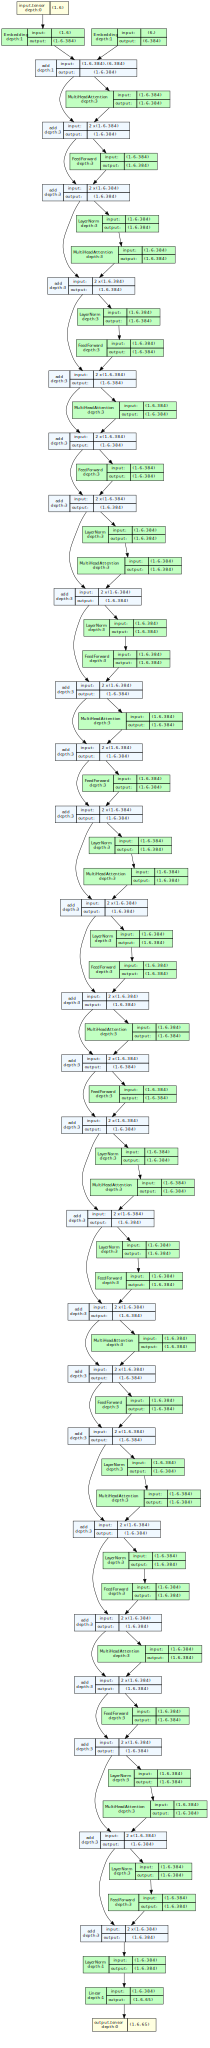

In [143]:
model_graph.visual_graph